In [1]:
import pyodim
import numpy as np
from dualprf_correction import dualprf_correction
from matplotlib import pyplot as plt

In [10]:
# load test file using pyodim
test_file = '66_20231210_032500.pvol.h5'
dataset = pyodim.read_odim(test_file, lazy_load=False)

In [ ]:
# apply dual PRF correction
dataset = dualprf_correction.process_pyodim(dataset, two_step=True,
                    kernel_det=np.ones((11, 11)), kernel_cor=np.ones((5, 5)),
                    vel_field='VRADH', new_field_name='velocity_dprf', check_invalid=True)

/scratch/kl02/jss548/tmp/ipykernel_1611754/2365823766.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax1.pcolormesh(x_coords, y_coords, dataset[sweep_idx]['VRADH'].values, cmap='bwr', vmin=-30, vmax=30)
/scratch/kl02/jss548/tmp/ipykernel_1611754/2365823766.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax2.pcolormesh(x_coords, y_coords, dataset[sweep_idx]['velocity_dprf'].values, cmap='bwr', vmin=-30, vmax=30)


(-150.0, 150.0)

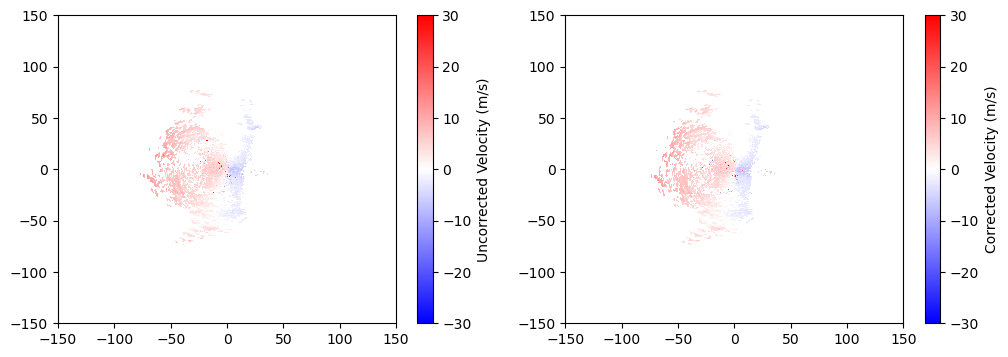

In [12]:
# plot results
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12,4))
ylim = (-150, 150)
xlim = (-150, 150)
sweep_idx = 2
x_coords = dataset[sweep_idx].x/1000
y_coords = dataset[sweep_idx].y/1000

im = ax1.pcolormesh(x_coords, y_coords, dataset[sweep_idx]['VRADH'].values, cmap='bwr', vmin=-30, vmax=30)
cbar = fig.colorbar(im, ax=ax1, label='Uncorrected Velocity (m/s)')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

im = ax2.pcolormesh(x_coords, y_coords, dataset[sweep_idx]['velocity_dprf'].values, cmap='bwr', vmin=-30, vmax=30)
cbar = fig.colorbar(im, ax=ax2, label='Corrected Velocity (m/s)')
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)